# Lab 5 - Data Visualization

In [543]:
import pandas as pd
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [544]:
df = pd.read_csv("nfloffenseweek3.csv")
df.head()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 32 artists>

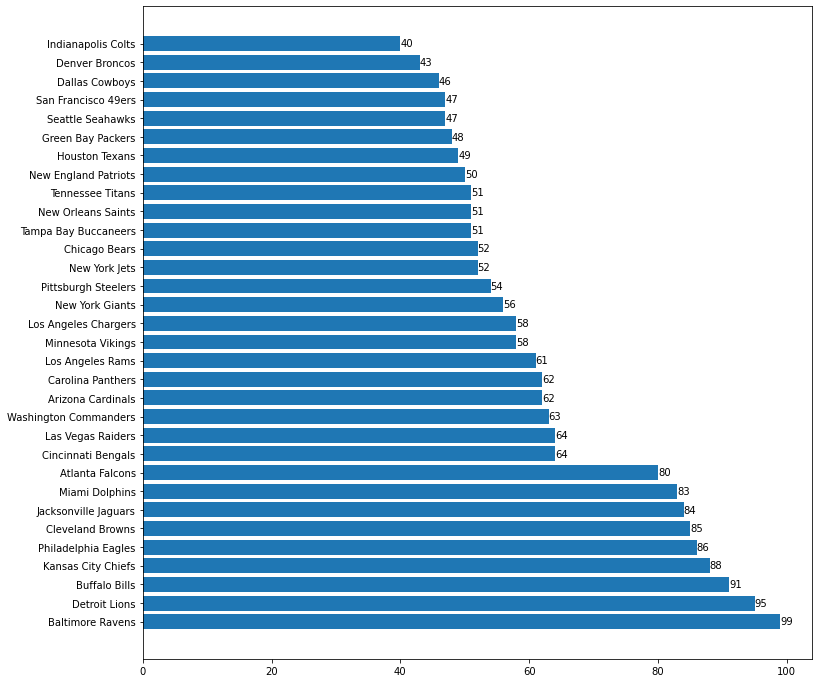

In [545]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored )
plt.bar_label(barhplot, labels = df.points_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

C:\Users\ed2to\AppData\Local\Temp\ipykernel_23124\1282618791.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['team'])['passing_yards', 'rushing_yards'].mean().plot(kind = "bar", stacked = True,


<Figure size 432x288 with 0 Axes>

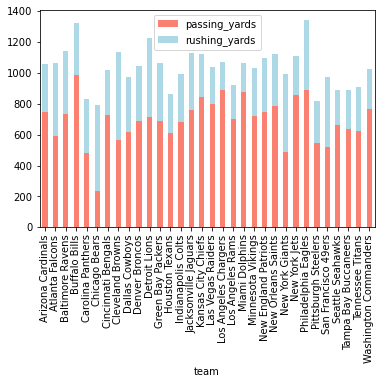

In [546]:
# df.plot.bar(stacked=True)
# plt.figure(figsize=(12, 12))
# stack_nfl = df.groupby(['team', 'passing_yards', 'rushing_yards'])
# stack_nfl = plt.bar(df.team, df.passing_yards, df.rushing_yards)
# stack_nfl.plot(kind='bar', stacked=True)

plt.figure()
df.groupby(['team'])['passing_yards', 'rushing_yards'].mean().plot(kind = "bar", stacked = True,
 color = ['salmon', 'lightblue']
 );

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

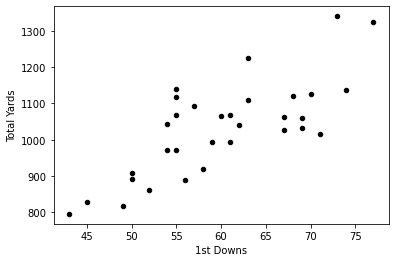

In [547]:
# this one works too, just no labels:
# plt.scatter( x= df['1st_downs'],y = df.total_yards, c= 'black')

df.plot.scatter(x ='1st_downs', y='total_yards',                      
                       c='black',
                       xlabel = '1st Downs',
                       ylabel = 'Total Yards',
                       );

# this also works but a little wonky:
# import seaborn as sns
# sns.scatterplot(x = df['1st_downs'], y = df.total_yards, data = df, hue=df.team);                       

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

In [548]:
week_4 = pd.read_csv("nfloffenseweek4.csv")
week_5 = pd.read_csv("nfloffenseweek5.csv")

LA Rams: 0    126
1    131
2    156
Name: penalty_yards, dtype: int64
Baltimore Ravens: 0     44
1    114
2    162
Name: penalty_yards, dtype: int64


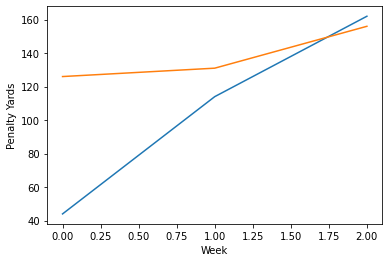

In [549]:
# penalty_yards for Baltimore Ravens and LA Rams

# week3 = df[df.team  == 'Los Angeles Rams']
# week4 = week_4[week_4.team  == 'Los Angeles Rams']
# week5 = week_5[week_5.team  == 'Los Angeles Rams']

# trying merge:
# week3_4 = pd.merge(df, week_4)
# one_dataframe = pd.merge(week3_4, week_5)

# one_dataframe.plot.line(x = one_dataframe.games, y = df.games )

# one week at a time?
# fig,ax = plt.subplots()
# x = df[df.team  == 'Los Angeles Rams']
# y = df.penalty_yards

# trying groupby:
# df.groupby(df['team'])['penalty_yards']

# trying concat:
# all = pd.concat([df, week_4, week_5])

plt.figure()
balt = all[all.team.isin(['Baltimore Ravens'])].reset_index(drop=True)
la = all[all.team.isin(['Los Angeles Rams'])].reset_index(drop=True)

baltimore = balt.penalty_yards
la_rams = la.penalty_yards

hope = baltimore.plot.line(ylabel = 'Penalty Yards')
love = la_rams.plot.line(xlabel = 'Week')
print('LA Rams:', la_rams)
print('Baltimore Ravens:', baltimore)



6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).( Scatter plot)

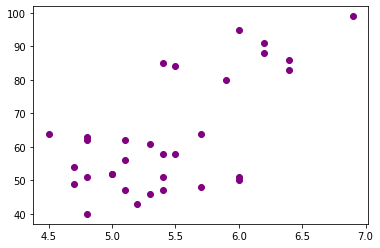

In [550]:
# points_scored average on x
# yards_per_play average on y
# for each team
plt.scatter(x = df.yards_per_play, y = df.points_scored, c = 'purple')

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

<AxesSubplot:xlabel='Week', ylabel='Penalty Yards'>

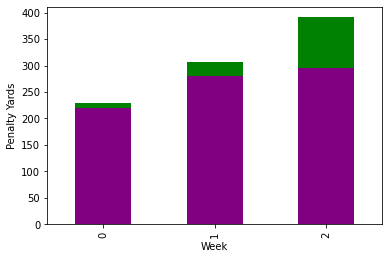

In [551]:
# penalty_yards
# NFC West = Arizona Cardinals, 
#            Los Angeles Rams, 
#            San Francisco 49ers, and Seattle Seahawks
team1 = all[all.team.isin( ['San Francisco 49ers'] )].reset_index(drop=True)
team2 = all[all.team.isin( ['Seattle Seahawks'] )].reset_index(drop=True)
team3 = all[all.team.isin( ['Los Angeles Rams'] )].reset_index(drop=True)
team4 = all[all.team.isin( ['Arizona Cardinals'] )].reset_index(drop=True)

# first_set = pd.merge(team1,team2, how = "inner")
# next_set = pd.merge(first_set, team3, how='inner')
# last_set = pd.merge(next_set, team4)
# last_set

# all.plot.bar()

a = team1.penalty_yards
b = team2.penalty_yards
c = team3.penalty_yards
d = team4.penalty_yards
# plt.figure(figsize=(10, 10))

a.plot.bar(color = 'black',xlabel='Week', ylabel = 'Penalty Yards')
b.plot.bar(color = 'green')
c.plot.bar(color = 'red')
d.plot.bar(color = 'purple')

# um...
# tog = pd.merge(df,week_4, on = 'team')
# together = pd.merge(tog,week_5, on = 'team')
# together
# plt.figure(figsize=(20, 20))
# together.plot.bar(x='team')


8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

In [559]:
# join all 
one = pd.merge(df, week_4, on='team')
main = pd.merge(one,week_5, on='team')
# NFC and AFC are combined. 

# West
west = main[main.team.isin([
    'San Francisco 49ers', 'Los Angeles Rams', 'Seattle Seahawks','Arizona Cardinals',
    'Denver Broncos','Kansas City Chiefs','Las Vegas Raiders','Los Angeles Chargers'
])]
# East
east = main[main.team.isin([
    'Buffalo Bills', 'Miami Dolphins', 'New England Patriots', 'New York Jets'
    'Dallas Cowboys','New York Giants','Philadelphia Eagles','Washington Football Team'
])]
# North
north = main[main.team.isin([
    'Baltimore Ravens','Cincinnati Bengals','Cleveland Browns','Pittsburgh Steelers',
    'Chicago Bears','Detroit Lions','Green Bay Packers','Minnesota Vikings',
])]
# South
south = main[main.team.isin([
    'Atlanta Falcons','Carolina Panthers','New Orleans Saints','Tampa Bay Buccaneers',
    'Houston Texans','Indianapolis Colts','Jacksonville Jaguars','Tennessee Titans'
])]
# all merged:
# p = pd.merge(west,east, how= 'outer')
# w = pd.merge(p,north, how= 'outer')
# last = pd.merge(w,south, how= 'outer')
# last.points_scored.plot.bar()


